# Insiders

## <font color ='red'> Ciclo 00 - Planteamento </font>

## <font color ='red'> Ciclo 01 - Métricas de validacion de clusters </font>

1. Feature Engineering
    - Recencia
    - Frecuencia
    - Monetizacion
    
2. Métricas de validacion de clustering
    - WSS (Within-Cluster Sum of Square)
    - SS (Silhouette Score)
    
3. Cluster Analysis
    - Plot 3D
    - Cluster Profile

## <font color ='red'> Ciclo 02 - Análisis de Silhouette </font>

1. Feature Engineering
    - Averange Ticket
    
2. Análisis de Silhouette
    - Silhouette Analysis
    
3. Cluster Visualización
    - UMAP

4. Cluster Analisis de perfil
    - Descripcion de los criterios de los cluster

## <font color ='red'> Ciclo 03 - Descripción de estadísticas </font>

1. Análisis Descriptiva
    - Atributos numéricos
    - Atributos categóricos
    
2. Feature Engineering
    - Averange Recency
    - Numbers of returns
    
3. Data preparation
    - Standard Scaler
    
4. Analisis de Sillhouette
    
3. Cluster Visualization
    - UMAP

## <font color ='red'> Ciclo 04 - Feature Enginnering </font>

1. Análisis Descriptiva
    - Fix NA
    
2. Feature Engineering
    - Averange Recency Days
    - Frequency medio = Number of purchase/Timespan
    - Ticket medio of returns
    - Gross revenue by country
    - Country encodded by lat, long
    - Drop number of purchase
    
3. Metricas de validacion de clustering
    - gap statistics
    
4. Analisis de Sillhouette
    
3. Cluster Visualization
    - UMAP

## <font color ='red'> Ciclo 05 - EDA (Space study) </font>

1. Univariate Analysis
    - Remove outliers
    - LUX framework for EDA
    
2. Bivariate Analysis
    - Pairplot
    
3. Embedding
    - PCA
    - UMAP
    - TSNE
    - Tree-Based

## 0.0 Planteando la solución

## Input:

## Output:

## Task

## Benchmark de soluciones
### 1.Desk Research

# 0.1 IMPORTS

In [82]:
import numpy      as np
import pandas     as pd
import seaborn    as sns
import umap.umap_ as umap

from matplotlib          import pyplot        as plt
from IPython.display     import HTML
from sklearn             import cluster       as c
from sklearn             import metrics       as m
from sklearn             import preprocessing as pp
from sklearn             import decomposition as dd
from sklearn.manifold    import TSNE
from sklearn.cluster     import KMeans
from sklearn.datasets    import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from plotly              import express        as px
from pandas_profiling    import ProfileReport


## 0.2 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display(HTML ('<style>.container {width:import; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.3 Load Dataset

In [25]:
#http://localhost:8892/edit/Downloads/PA%20005/Ecommerce.csv
import codecs

f = codecs.open('Ecommerce.csv', 'r', encoding='utf-8')
txt = f.read()

In [3]:
#load data
df_raw = pd.read_csv('Ecommerce.csv', low_memory=False)

#drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis =1)

In [4]:
df_raw.head(3)

InvoiceNo StockCode                         Description  Quantity InvoiceDate  UnitPrice  CustomerID         Country
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   29-Nov-16       2.55     17850.0  United Kingdom
1    536365     71053                 WHITE METAL LANTERN         6   29-Nov-16       3.39     17850.0  United Kingdom
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   29-Nov-16       2.75     17850.0  United Kingdom

# <font color ='red'> 1.0 Data descripcion </font>

In [5]:
df1 = df_raw.copy()

## 1.1 Rename columns

In [6]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']
df1.columns = cols_new

## 1.2 Data Dimensions

In [7]:
print( 'Number of rows: {}'.format(df1.shape[0]))
print( 'Number of columns: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of columns: 8


## 1.3 Data types

In [39]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [8]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA 

In [9]:
df_missing=df1.loc[df1['customer_id'].isna(), :]
df_not_missing=df1.loc[~df1['customer_id'].isna(),:]

In [10]:
missing_invoice=df_missing['invoice_no'].drop_duplicates().tolist()
missing_invoice[0:10]

['536414',
 '536544',
 '536545',
 '536546',
 '536547',
 '536549',
 '536550',
 '536552',
 '536553',
 '536554']

In [11]:
df_not_missing.loc[df_not_missing['invoice_no'].isin(missing_invoice), :].head()

Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_date, unit_price, customer_id, country]
Index: []

In [16]:
df_not_missing['customer_id'].max()

18287.0

In [17]:
#np.arange(19000, 19000+len(df_missing),1)

In [12]:
#create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id']= np.arange(19000, 19000+len(df_backup),1)

#merge original with reference dataframe
df1=pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce
df1['customer_id']=df1['customer_id_x'].combine_first(df1['customer_id_y'])

#drop extra columns
df1 = df1.drop(columns=['customer_id_x','customer_id_y'])


df1.head()

invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER         6    29-Nov-16        2.55  United Kingdom      17850.0
1     536365      71053                  WHITE METAL LANTERN         6    29-Nov-16        3.39  United Kingdom      17850.0
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER         8    29-Nov-16        2.75  United Kingdom      17850.0
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6    29-Nov-16        3.39  United Kingdom      17850.0
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.         6    29-Nov-16        3.39  United Kingdom      17850.0

In [28]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## 1.6 Change dtypes

In [13]:
#invoice_date
df1['invoice_date'] = pd.to_datetime (df1['invoice_date'], format= '%d-%b-%y')

#customer_id
df1['customer_id']= df1['customer_id'].astype( int)
df1.head(3)

invoice_no stock_code                         description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053                 WHITE METAL LANTERN         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B      CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75  United Kingdom        17850

In [30]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int32
dtype: object

## 1.7 Descriptive Statistics 

In [14]:
num_attributes = df1.select_dtypes(include = ['int32','int64','float64'])
cat_attributes = df1.select_dtypes(exclude = ['int32','int64','float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [15]:
#central tendency - mean, mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion - desviacion estandard, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis ())).T

#concatenate
m = pd.concat ([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','media','mediana','std','skew','kurtosis']
m

attributes       min      max      range         media   mediana          std        skew       kurtosis
0     quantity -80995.00  80995.0  161990.00      9.552250      3.00   218.080957   -0.264076  119769.160031
1   unit_price -11062.06  38970.0   50032.06      4.611114      2.08    96.759764  186.506972   59005.719097
2  customer_id  12346.00  22709.0   10363.00  16688.840453  16249.00  2911.408666    0.487449      -0.804287

### <font color ='red'> 1.7.1.1 Numerical Attributs - investigating </font>

1. Quantity negativa (¿puede ser por devolucion?)

2. Precio unitario igual a zero (¿puede ser por promocion?)

## 1.7.2 Categorical Attributs - Investigating

In [16]:
cat_attributes.head()

invoice_no stock_code                          description         country
0     536365     85123A   WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
1     536365      71053                  WHITE METAL LANTERN  United Kingdom
2     536365     84406B       CREAM CUPID HEARTS COAT HANGER  United Kingdom
3     536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE  United Kingdom
4     536365     84029E       RED WOOLLY HOTTIE WHITE HEART.  United Kingdom

In [17]:
#cat_attributes['invoice_no'].astype(int)
len(cat_attributes.loc[cat_attributes['invoice_no'].apply(lambda x:bool (re.search('[^0-9]+',x))), 'invoice_no'].drop_duplicates())

3839

In [18]:
df_letter_invoices = df1.loc[df1['invoice_no'].apply (lambda x: bool(re.search('[^0-9]+', x))), :]
df_letter_invoices

print('Total number of invoices: {}'.format(len(df_letter_invoices)))
print('Total number of negative quantity: {}'.format(len(df_letter_invoices[df_letter_invoices['quantity']<0])))

Total number of invoices: 9291
Total number of negative quantity: 9288


In [19]:
#stock code
at_least_one_string = len(cat_attributes.loc[cat_attributes['stock_code'].apply(lambda x:bool (re.search('[^0-9]+',x))), 'stock_code'])
print(at_least_one_string)

54873


In [20]:
#check stock codes only characters
cat_attributes.loc[cat_attributes['stock_code'].apply(lambda x:bool (re.search ('^[a-zA-Z]+$',x))), 'stock_code'].unique()
#df1.loc[cat_attributes['stock_code'].apply(lambda x:bool (re.search ('^[a-zA-Z]+$',x))), :].head()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [21]:
df1.head(3)
#delete description

invoice_no stock_code                         description  quantity invoice_date  unit_price         country  customer_id
0     536365     85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   2016-11-29        2.55  United Kingdom        17850
1     536365      71053                 WHITE METAL LANTERN         6   2016-11-29        3.39  United Kingdom        17850
2     536365     84406B      CREAM CUPID HEARTS COAT HANGER         8   2016-11-29        2.75  United Kingdom        17850

In [14]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [17]:
len(df1['country'].unique())

37

In [16]:
#reprensatividad de comprars por país
df1['country'].value_counts(normalize = True)

United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RSA       

In [22]:
df1[['customer_id', 'country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False)

country  customer_id
36        United Kingdom         7587
14               Germany           95
13                France           90
10                  EIRE           44
31                 Spain           31
3                Belgium           25
33           Switzerland           24
27              Portugal           20
19                 Italy           15
16             Hong Kong           15
12               Finland           12
1                Austria           11
25                Norway           10
24           Netherlands            9
0              Australia            9
37           Unspecified            9
9                Denmark            9
6        Channel Islands            9
7                 Cyprus            8
32                Sweden            8
20                 Japan            8
18                Israel            7
26                Poland            6
5                 Canada            4
34                   USA            4
2                Bahrain            4
15                Greece            4
23                 Malta            2
35  United Arab Emirates            2
8         Czech Republic            1
22             Lithuania            1
11    European Community            1
21               Lebanon            1
28                   RSA            1
29          Saudi Arabia            1
30             Singapore            1
17               Iceland            1
4                 Brazil            1

# <font color ='red'> 2.0 Filtering Variables </font>

In [23]:
df2=df1.copy()

In [16]:
df2.loc[df2['quantity']<0, :].sort_values(['customer_id','description']).head(20)

invoice_no stock_code                          description  quantity invoice_date  unit_price         country  customer_id
61624     C541433      23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   2017-01-16        1.04  United Kingdom        12346
129743    C547388      21914               BLUE HARMONICA IN BOX        -12   2017-03-20        1.25          Norway        12352
129738    C547388      37448      CERAMIC CAKE DESIGN SPOTTED MUG       -12   2017-03-20        1.49          Norway        12352
129741    C547388      22645  CERAMIC HEART FAIRY CAKE MONEY BANK       -12   2017-03-20        1.45          Norway        12352
129739    C547388      22784                LANTERN CREAM GAZEBO         -3   2017-03-20        4.95          Norway        12352
129742    C547388      22413      METAL SIGN TAKE IT OR LEAVE IT         -6   2017-03-20        2.95          Norway        12352
106394    C545329          M                               Manual        -1   2017-02-27      280.05          Norway        12352
106395    C545329          M                               Manual        -1   2017-02-27      183.75          Norway        12352
106397    C545330          M                               Manual        -1   2017-02-27      376.50          Norway        12352
129740    C547388      22701                        PINK DOG BOWL        -6   2017-03-20        2.95          Norway        12352
129737    C547388      84050      PINK HEART SHAPE EGG FRYING PAN       -12   2017-03-20        1.65          Norway        12352
154936    C549955      22839      3 TIER CAKE TIN GREEN AND CREAM        -2   2017-04-11       14.95          Cyprus        12359
519796    C580165      22797      CHEST OF DRAWERS GINGHAM HEART         -2   2017-11-30       16.95          Cyprus        12359
519798    C580165      22826        LOVE SEAT ANTIQUE WHITE METAL        -1   2017-11-30       42.50          Cyprus        12359
154937    C549955      22666      RECIPE BOX PANTRY YELLOW DESIGN        -2   2017-04-11        2.95          Cyprus        12359
519799    C580165      22720    SET OF 3 CAKE TINS PANTRY DESIGN         -1   2017-11-30        4.95          Cyprus        12359
519797    C580165      23245           SET OF 3 REGENCY CAKE TINS        -2   2017-11-30        4.95          Cyprus        12359
507365    C579178      22941         CHRISTMAS LIGHTS 10 REINDEER        -2   2017-11-26        8.50         Belgium        12362
507366    C579178      22942          CHRISTMAS LIGHTS 10 SANTAS         -2   2017-11-26        8.50         Belgium        12362
507367    C579178      22943  CHRISTMAS LIGHTS 10 VINTAGE BAUBLES        -3   2017-11-26        4.95         Belgium        12362

In [64]:
df2.loc[df2['invoice_no'].apply(lambda x: bool (re.search('.540152',x) ) ), :].head()

invoice_no stock_code                      description  quantity invoice_date  unit_price  country  customer_id
43857    C540152      22666  RECIPE BOX PANTRY YELLOW DESIGN        -1   2017-01-03        2.95  Belgium        12395

In [48]:
df2.loc[df2['customer_id'] == 12395, :].sort_values('description')

invoice_no stock_code                          description  quantity invoice_date  unit_price  customer_id  country
376135     569496      23345                    DOLLY GIRL BEAKER        12   2017-10-02        1.25        12395  Belgium
7289       537026      84992       72 SWEETHEART FAIRY CAKE CASES        24   2016-12-01        0.55        12395  Belgium
245658     558623      22726           ALARM CLOCK BAKELIKE GREEN         4   2017-06-28        3.75        12395  Belgium
376138     569496      22726           ALARM CLOCK BAKELIKE GREEN         4   2017-10-02        3.75        12395  Belgium
450066     575154      22726           ALARM CLOCK BAKELIKE GREEN         4   2017-11-06        3.75        12395  Belgium
186869     552884      22730           ALARM CLOCK BAKELIKE IVORY         4   2017-05-10        3.75        12395  Belgium
245659     558623      22729          ALARM CLOCK BAKELIKE ORANGE         4   2017-06-28        3.75        12395  Belgium
186868     552884      22729          ALARM CLOCK BAKELIKE ORANGE         4   2017-05-10        3.75        12395  Belgium
186867     552884      22728            ALARM CLOCK BAKELIKE PINK         4   2017-05-10        3.75        12395  Belgium
450068     575154      22728            ALARM CLOCK BAKELIKE PINK         4   2017-11-06        3.75        12395  Belgium
376137     569496      22727            ALARM CLOCK BAKELIKE RED          4   2017-10-02        3.75        12395  Belgium
450067     575154      22727            ALARM CLOCK BAKELIKE RED          4   2017-11-06        3.75        12395  Belgium
186866     552884      22727            ALARM CLOCK BAKELIKE RED          4   2017-05-10        3.75        12395  Belgium
450069     575154      21914               BLUE HARMONICA IN BOX         12   2017-11-06        1.25        12395  Belgium
376142     569496      21914               BLUE HARMONICA IN BOX         12   2017-10-02        1.25        12395  Belgium
36285      539447      22504          CABIN BAG VINTAGE RETROSPOT         3   2016-12-15       12.75        12395  Belgium
175776     551985      22712                     CARD DOLLY GIRL         12   2017-05-03        0.42        12395  Belgium
186874     552884      22712                     CARD DOLLY GIRL         12   2017-05-10        0.42        12395  Belgium
376130     569496      22984                   CARD GINGHAM ROSE         12   2017-10-02        0.42        12395  Belgium
186875     552884      22817                   CARD SUKI BIRTHDAY        12   2017-05-10        0.42        12395  Belgium
175778     551985      22817                   CARD SUKI BIRTHDAY        12   2017-05-03        0.42        12395  Belgium
450070     575154      22661      CHARLOTTE BAG DOLLY GIRL DESIGN        20   2017-11-06        0.85        12395  Belgium
245654     558623      22661      CHARLOTTE BAG DOLLY GIRL DESIGN        20   2017-06-28        0.85        12395  Belgium
485098     577551      22661      CHARLOTTE BAG DOLLY GIRL DESIGN        10   2017-11-18        0.85        12395  Belgium
130895     547517      22661      CHARLOTTE BAG DOLLY GIRL DESIGN        20   2017-03-21        0.85        12395  Belgium
36295      539447      22356          CHARLOTTE BAG PINK POLKADOT        10   2016-12-15        0.85        12395  Belgium
485100     577551      22356          CHARLOTTE BAG PINK POLKADOT        10   2017-11-18        0.85        12395  Belgium
130896     547517      22356          CHARLOTTE BAG PINK POLKADOT        10   2017-03-21        0.85        12395  Belgium
36294      539447      22355            CHARLOTTE BAG SUKI DESIGN        10   2016-12-15        0.85        12395  Belgium
130897     547517      22355            CHARLOTTE BAG SUKI DESIGN       100   2017-03-21        0.72        12395  Belgium
7288       537026      22355            CHARLOTTE BAG SUKI DESIGN        10   2016-12-01        0.85        12395  Belgium
450006     575151      22899         CHILDREN'S APRON DOLLY GIRL       

In [24]:
###    Numerical Attributes

#unit price >0.0
df2=df2.loc[df2['unit_price']>0.010, :]

#stock code != [ POST, D, M, DOT, CRUK]
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'])]

###Description
df2= df2.drop(columns='description', axis = 1)

### map
df2= df2[~df2['country'].isin(['European Community', 'Unspecified'])]

#Quantity - negative numbers means product returns
#df2.loc[df2['invoice_no']=='C536391',:]
#df2.loc[df2['customer_id']==17548,:].sort_values('description')
df2_returns= df2.loc[df2['quantity'] <0,:]
df2_purchase = df2.loc[df2['quantity']>=0,:]

# <font color ='red'> 3.0 Feature Engineering </font>

In [ ]:
## Features Ideas:
# Moving Average - 7d, 14d, 30d
# cuantidad de compras antes y despues del día 15
# average fiancial
# basket size price

In [43]:
df3 = df2.copy()

In [47]:
#Data Reference
df_ref= df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date',
       'unit_price','country'], axis=1).drop_duplicates(ignore_index = True)
#df_ref.head()

## 3.1 Feature Creation

### 3.1.1 Gross Revenue

In [48]:
#gross revenue (facturacion)
df2_purchase.loc[:, 'gross_revenue']=df2_purchase.loc[:,'quantity'] * df2_purchase.loc[:, 'unit_price']

#Monetary
df_monetary = df2_purchase.loc[:, ['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge (df_ref, df_monetary, on='customer_id',how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### 3.1.2 Recency - Day from last purchase

In [49]:
#Recency - It depends on product returns
df_recency = df2_purchase.loc[:,['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max()-df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on = 'customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### 3.1.3 Quantity of purchased

In [50]:
df_freq = (df2_purchase.loc[:,['customer_id','invoice_no']].drop_duplicates()
                                                          .groupby('customer_id')
                                                          .count()
                                                          .reset_index()
                                                          .rename(columns={'invoice_no':'cant_invoices'}))
            
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how = 'left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
cant_invoices    91
dtype: int64

### 3.1.4 Quantity total of items purchased

In [51]:
df_freq = (df2_purchase.loc[:,['customer_id','quantity']].groupby('customer_id')
                                                        .sum()
                                                        .reset_index()
                                                        .rename(columns={'quantity':'cant_items'}))
        
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how = 'left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
cant_invoices    91
cant_items       91
dtype: int64

### 3.1.5 Quantity of products purchased

In [52]:
df_freq = (df2_purchase.loc[:,['customer_id','stock_code']].groupby('customer_id')
                                                        .count()
                                                        .reset_index()
                                                        .rename(columns={'stock_code':'cant_products'}))
        
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how = 'left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
cant_invoices    91
cant_items       91
cant_products    91
dtype: int64

### 3.1.5 Average ticket value

In [53]:
#Avg Ticket
df_avg_ticket = df2_purchase.loc[:, ['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref= pd.merge(df_ref, df_avg_ticket,on= 'customer_id',how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
cant_invoices    91
cant_items       91
cant_products    91
avg_ticket       91
dtype: int64

### 3.1.6 Avarage recency days

In [64]:
df2.loc[df2['customer_id'] == 17850, ['invoice_no','invoice_date']].drop_duplicates().head(10)

invoice_no invoice_date
0       536365   2016-11-29
7       536366   2016-11-29
47      536372   2016-11-29
49      536373   2016-11-29
66      536375   2016-11-29
84      536377   2016-11-29
278     536396   2016-11-29
315     536399   2016-11-29
416     536406   2016-11-29
433     536407   2016-11-29

In [54]:
#df2[['customer_id', 'invoice_date']].head()
df_aux = df2[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending=['False', 'False'])
df_aux['next_customer_id'] = df_aux['customer_id'].shift() #next customer
df_aux['previous_date'] = df_aux['invoice_date'].shift() #next invoice date

df_aux['avg_recency_days'] = df_aux.apply( lambda x: (x['invoice_date']-x['previous_date']).days if x['customer_id']==x['next_customer_id']else np.nan, axis=1)

df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis=1).dropna()

#average recency
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()

df_ref = pd.merge (df_ref, df_avg_recency_days, on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
cant_invoices         91
cant_items            91
cant_products         91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### 3.1.7 Frequency Purchase

In [32]:
#df_max = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').max()
#df_min = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').min()
#df_purchase = df2[['customer_id', 'invoice_date']].drop_duplicates().groupby('customer_id').count()

In [55]:
df_aux=(df2_purchase[['customer_id','invoice_no', 'invoice_date']].drop_duplicates()
                                                  .groupby('customer_id')
                                                  .agg( max_= ('invoice_date', 'max'),
                                                        min_ = ('invoice_date', 'min'),
                                                        days_= ('invoice_date', lambda x:((x.max()-x.min()).days)+1),
                                                        buy_=('invoice_no', 'count'))).reset_index()

#Frequency
df_aux['frequency'] = df_aux[['buy_','days_']].apply(lambda x: x['buy_']/x['days_']if x['days_'] != 0 else 0, axis=1)

#merge
df_ref = pd.merge(df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
cant_invoices         91
cant_items            91
cant_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
dtype: int64

In [34]:
df_aux.sort_values('frequency', ascending=False).head()

customer_id       max_       min_  days_  buy_  frequency
2777        16120 2017-10-09 2017-10-09      1     5        5.0
2020        15098 2017-06-08 2017-06-08      1     4        4.0
2687        16000 2017-12-05 2017-12-05      1     3        3.0
2635        15920 2017-07-06 2017-07-06      1     3        3.0
3813        17545 2017-10-25 2017-10-25      1     3        3.0

### 3.1.8 Numbers of returns

In [56]:
df_returns = df2_returns[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'cant_returns'})
df_returns['cant_returns'] = df_returns['cant_returns']*-1

df_ref = pd.merge(df_ref,df_returns,on='customer_id', how='left')
df_ref.loc[df_ref['cant_returns'].isna(), 'cant_returns']=0
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
cant_invoices         91
cant_items            91
cant_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
cant_returns           0
dtype: int64

### 3.1.9 Basket Size (cantidad de ítem por compra - quantity)

In [57]:
df_aux =(df2_purchase.loc[:,['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                       .agg(n_purchase = ('invoice_no','nunique'),
                                                                            n_products =('quantity', 'sum'))
                                                                       .reset_index())

df_aux['aux_basket_size'] = df_aux['n_products']/ df_aux['n_purchase']

#merge
df_ref=pd.merge(df_ref, df_aux[['customer_id','aux_basket_size']], on='customer_id',how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
cant_invoices         91
cant_items            91
cant_products         91
avg_ticket            91
avg_recency_days    2816
frequency             91
cant_returns           0
aux_basket_size       91
dtype: int64

In [151]:
#df_aux.head()
#df2_purchase[df2_purchase['customer_id']== 12346]

invoice_no stock_code  quantity invoice_date  unit_price         country  customer_id  gross_revenue
61619     541431      23166     74215   2017-01-16        1.04  United Kingdom        12346        77183.6

### 3.2.0 Unique Basket Size (cantidad de productos distintos por compra)
    -Invoice no = compra = purchase
    -Stock code = productos = product
    -Quantity = ítem

In [58]:
df_aux =(df2_purchase.loc[:,['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                       .agg(n_purchase = ('invoice_no','nunique'),
                                                                            n_products = ('stock_code', 'nunique'))
                                                                       .reset_index())

df_aux['avg_unique_basket_size'] = df_aux['n_products']/ df_aux['n_purchase']

#merge
df_ref=pd.merge(df_ref, df_aux[['customer_id','avg_unique_basket_size']], on='customer_id',how='left')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
cant_invoices               91
cant_items                  91
cant_products               91
avg_ticket                  91
avg_recency_days          2816
frequency                   91
cant_returns                 0
aux_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [41]:
df_ref.head()

customer_id  gross_revenue  recency_days  cant_invoices  cant_items  cant_products  avg_recency_days  frequency  cant_returns  aux_basket_size  avg_unique_basket_size
0        17850        5391.21         372.0           34.0      1733.0          297.0         35.500000  17.000000          40.0        50.970588                8.735294
1        13047        3232.59          56.0            9.0      1390.0          171.0         27.250000   0.028302          35.0       154.444444               19.000000
2        12583        6705.38           2.0           15.0      5028.0          232.0         23.187500   0.040323          50.0       335.200000               15.466667
3        13748         948.25          95.0            5.0       439.0           28.0         92.666667   0.017921           0.0        87.800000                5.600000
4        15100         876.00         333.0            3.0        80.0            3.0          8.600000   0.073171          22.0        26.666667                1.000000

# <font color ='red'> 4.0 EDA </font>

In [59]:
df4=df_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
cant_invoices             0
cant_items                0
cant_products             0
avg_ticket                0
avg_recency_days          0
frequency                 0
cant_returns              0
aux_basket_size           0
avg_unique_basket_size    0
dtype: int64

## 4.1 Univariate Analysis

In [38]:
profile= ProfileReport(df4)
profile.to_file ('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.1.1 gross revenue

In [50]:
df4.sort_values('gross_revenue', ascending = False).head(10)

customer_id  gross_revenue  recency_days  invoice_no  quantity    avg_ticket  avg_recency_days  frequency  cant_returns  aux_basket_size  avg_unique_basket_size
1017        14646      279138.02           1.0        72.0      58.0    135.503893          7.844444   0.206215         288.0      2733.944444               28.611111
492         18102      259657.30           0.0        60.0      74.0    602.453132         14.680000   0.163043           0.0      1068.733333                7.183333
434         17450      194550.79           8.0        46.0     102.0    577.302047         12.821429   0.136111         952.0      1521.586957                7.326087
3338        16446      168472.50           0.0         2.0       2.0  56157.500000        205.000000   0.014563       80995.0     40498.500000                1.500000
66          14911      140450.72           1.0       199.0      44.0     24.757751          2.601399   0.651475        3332.0       403.331658               28.507538
1150        12415      124564.53          24.0        20.0      49.0    174.704811         20.866667   0.076433         427.0      3868.650000               35.650000
191         14156      117379.63           9.0        55.0      54.0     83.842593          7.260000   0.178571         859.0      1052.454545               25.454545
15          17511       91062.38           2.0        31.0      44.0     94.561142         11.593750   0.120968        1535.0      2082.225806               31.064516
12          16029       72882.09          38.0        62.0      33.0    302.415311          9.054054   0.196429        8004.0       648.500000                3.887097
955         16684       66653.56           4.0        28.0      42.0    240.626570         22.125000   0.084507         864.0      1794.821429                9.892857

In [99]:
df4[df4['customer_id']==14646].head()

customer_id  gross_revenue  recency_days  cant_invoices  cant_items  cant_products  avg_ticket  avg_recency_days  frequency  cant_returns  aux_basket_size  avg_unique_basket_size
1017        14646      279138.02           1.0           72.0    196844.0         2060.0  135.503893          7.844444    0.20339         288.0      2733.944444               28.611111

### 4.1.2 Cantidad item

In [101]:
df4[df4['cant_products']==7838]

customer_id  gross_revenue  recency_days  cant_invoices  cant_items  cant_products  avg_ticket  avg_recency_days  frequency  cant_returns  aux_basket_size  avg_unique_basket_size
68        17841       40967.72           1.0          124.0     23053.0         7838.0    5.226808          3.321429    0.33244         203.0        185.91129               63.209677

### 4.1.3 Avg ticket 

In [102]:
df4[df4['avg_ticket']==56157.5]

customer_id  gross_revenue  recency_days  cant_invoices  cant_items  cant_products  avg_ticket  avg_recency_days  frequency  cant_returns  aux_basket_size  avg_unique_basket_size
3338        16446       168472.5           0.0            2.0     80997.0            3.0     56157.5             205.0   0.009709       80995.0          40498.5                     1.5

In [103]:
df3[df3['customer_id']==16446]

invoice_no stock_code  quantity invoice_date  unit_price         country  customer_id
194354     553573      22980         1   2017-05-16        1.65  United Kingdom        16446
194355     553573      22982         1   2017-05-16        1.25  United Kingdom        16446
540421     581483      23843     80995   2017-12-07        2.08  United Kingdom        16446
540422    C581484      23843    -80995   2017-12-07        2.08  United Kingdom        16446

## 4.2 Bivariate Analysis

In [104]:
cols = ['customer_id']
df4a = df4.drop(cols, axis = 1)

<Figure size 1800x864 with 0 Axes>

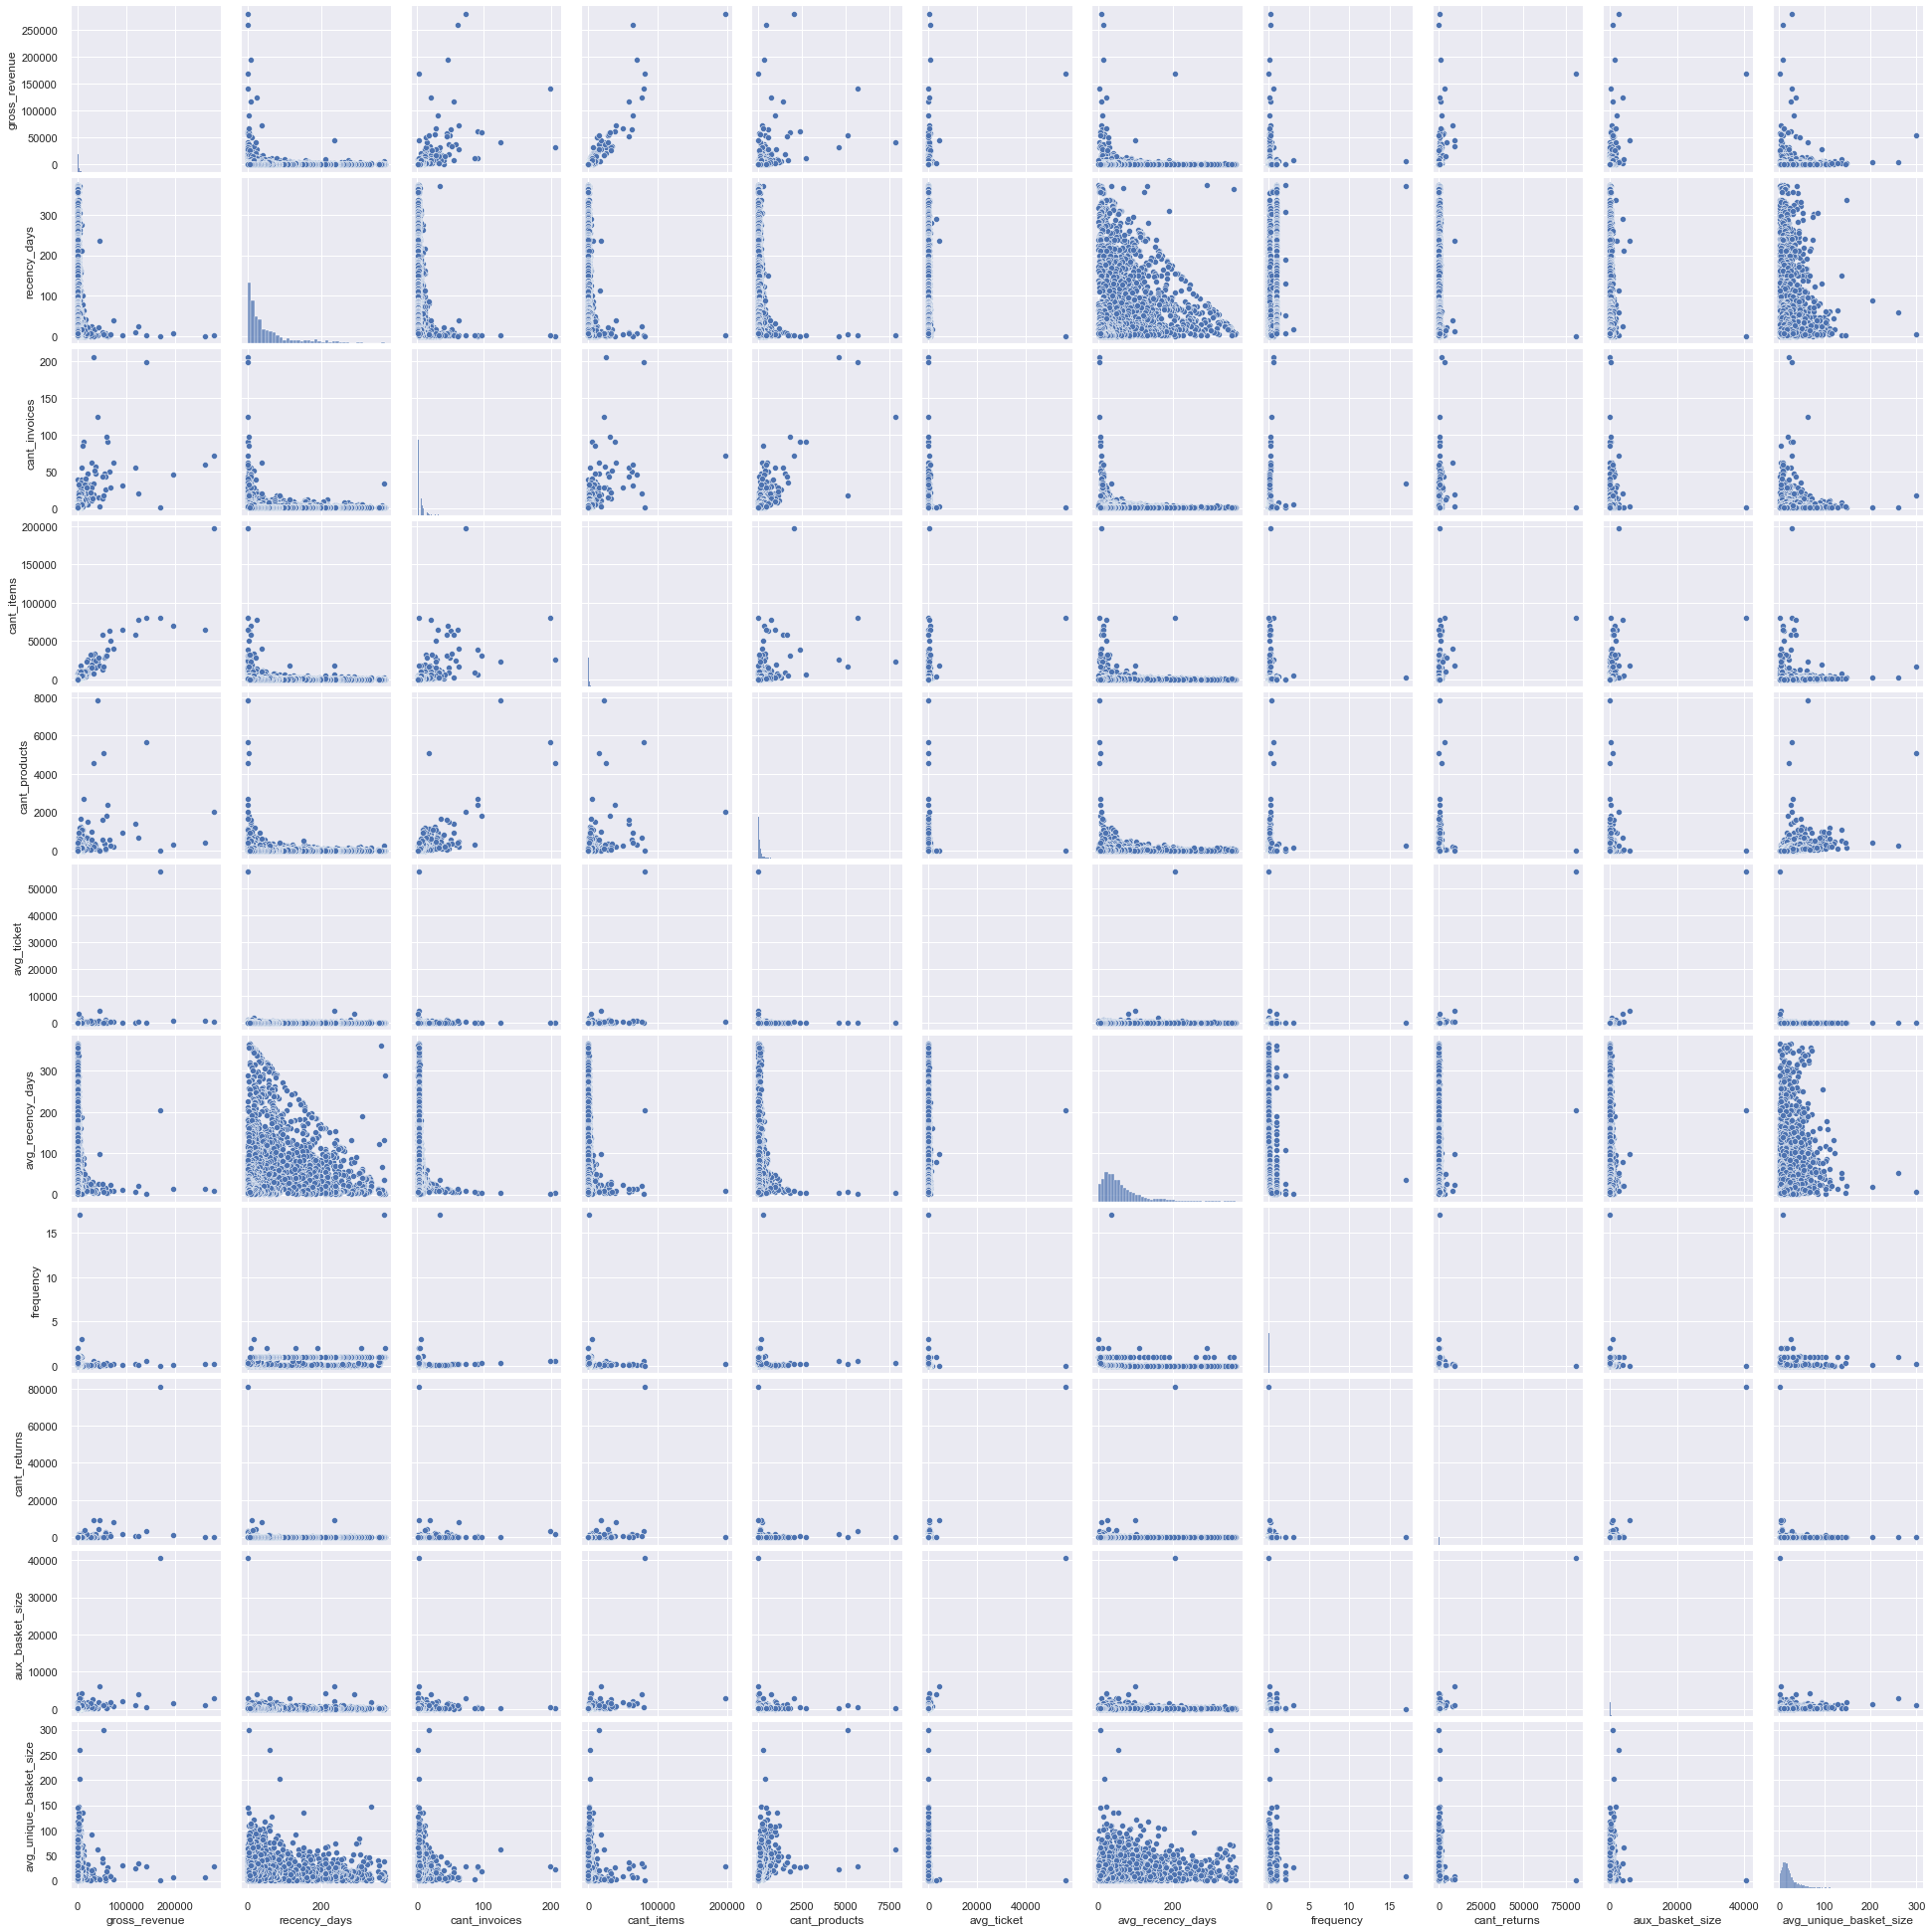

In [105]:
plt.figure(figsize=(25,12))
sns.pairplot(df4a)

## 4.3 Estudio del espacio

In [67]:
df4_espacio = df4.drop(columns = ['customer_id'], axis=1).copy()

In [69]:
df4_espacio.columns

Index(['gross_revenue', 'recency_days', 'cant_invoices', 'cant_items',
       'cant_products', 'avg_ticket', 'avg_recency_days', 'frequency',
       'cant_returns', 'aux_basket_size', 'avg_unique_basket_size'],
      dtype='object')

In [70]:
mm = pp.MinMaxScaler()

#

df4_espacio['gross_revenue'] = mm.fit_transform (df4_espacio[['gross_revenue']])
df4_espacio['recency_days'] = mm.fit_transform (df4_espacio[['recency_days']])
df4_espacio['cant_invoices'] = mm.fit_transform (df4_espacio[['cant_invoices']])
df4_espacio['cant_items'] = mm.fit_transform (df4_espacio[['cant_items']])
df4_espacio['cant_products'] = mm.fit_transform (df4_espacio[['cant_products']])
df4_espacio['avg_ticket'] = mm.fit_transform (df4_espacio[['avg_ticket']])
df4_espacio['avg_recency_days'] = mm.fit_transform (df4_espacio[['avg_recency_days']])
df4_espacio['frequency'] = mm.fit_transform (df4_espacio[['frequency']])
df4_espacio['cant_returns'] = mm.fit_transform (df4_espacio[['cant_returns']])
df4_espacio['aux_basket_size'] = mm.fit_transform (df4_espacio[['aux_basket_size']])
df4_espacio['avg_unique_basket_size'] = mm.fit_transform (df4_espacio[['avg_unique_basket_size']])

In [71]:
X = df4_espacio.copy()

### 4.3.1 PCA

In [72]:
X.shape[1]

11

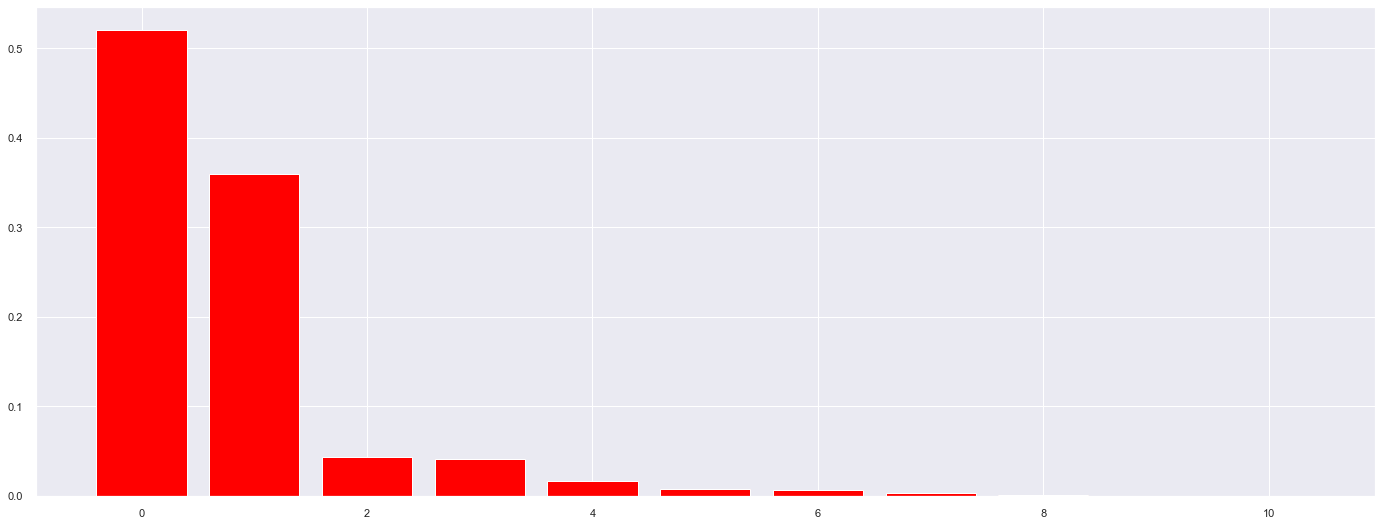

In [76]:
pca= dd.PCA(n_components = X.shape[1])

principal_components = pca.fit_transform(X)

#plot explained variable
features = range (pca.n_components_)

plt.bar (features, pca.explained_variance_ratio_, color='red')

#pca component
df_pca = pd.DataFrame(principal_components)

<AxesSubplot:xlabel='0', ylabel='1'>

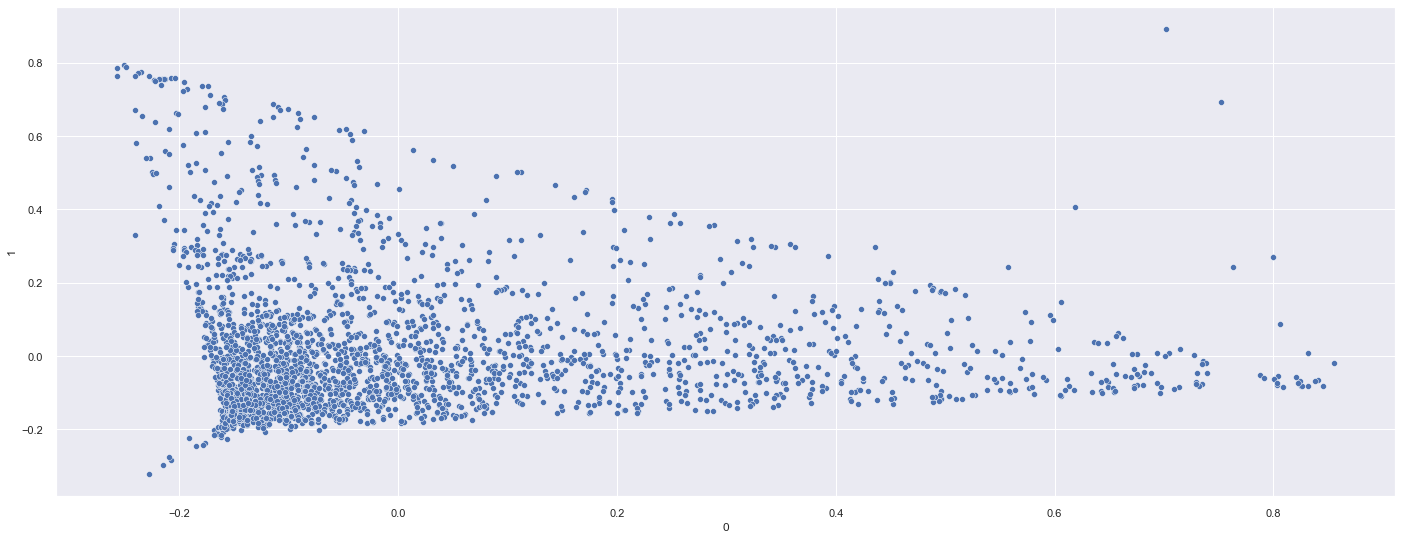

In [80]:
sns.scatterplot(x=0, y=1, data=df_pca)

### 4.3.2 UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

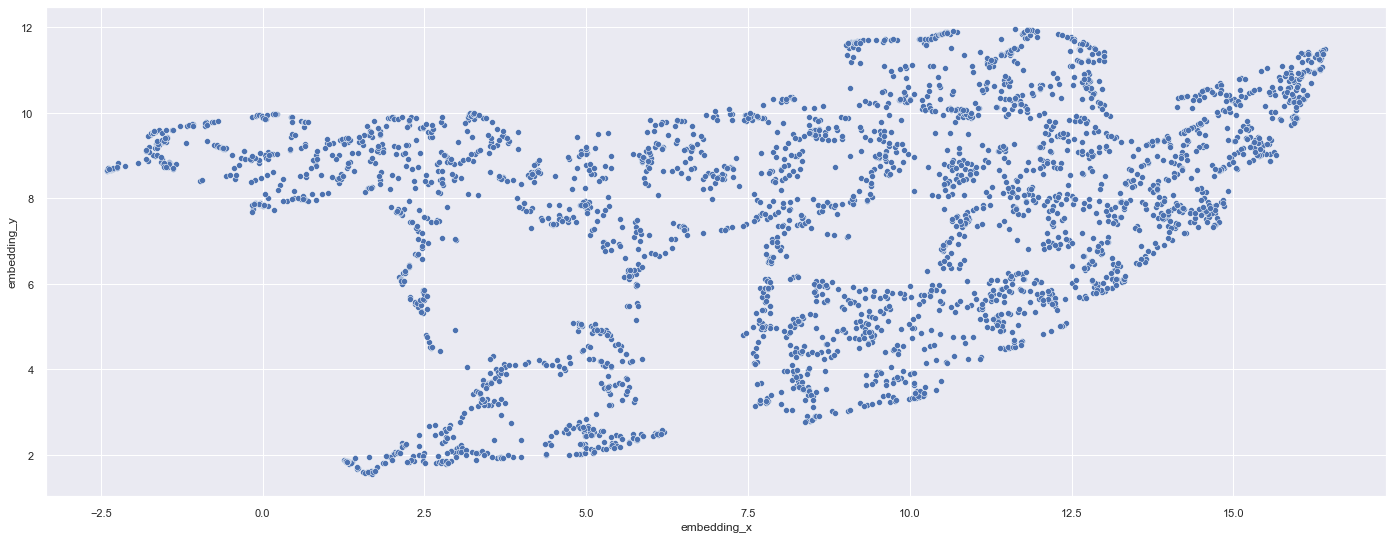

In [81]:
reducer= umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot (x='embedding_x', y='embedding_y', data=df_pca)

### 4.3.2 t-SNE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

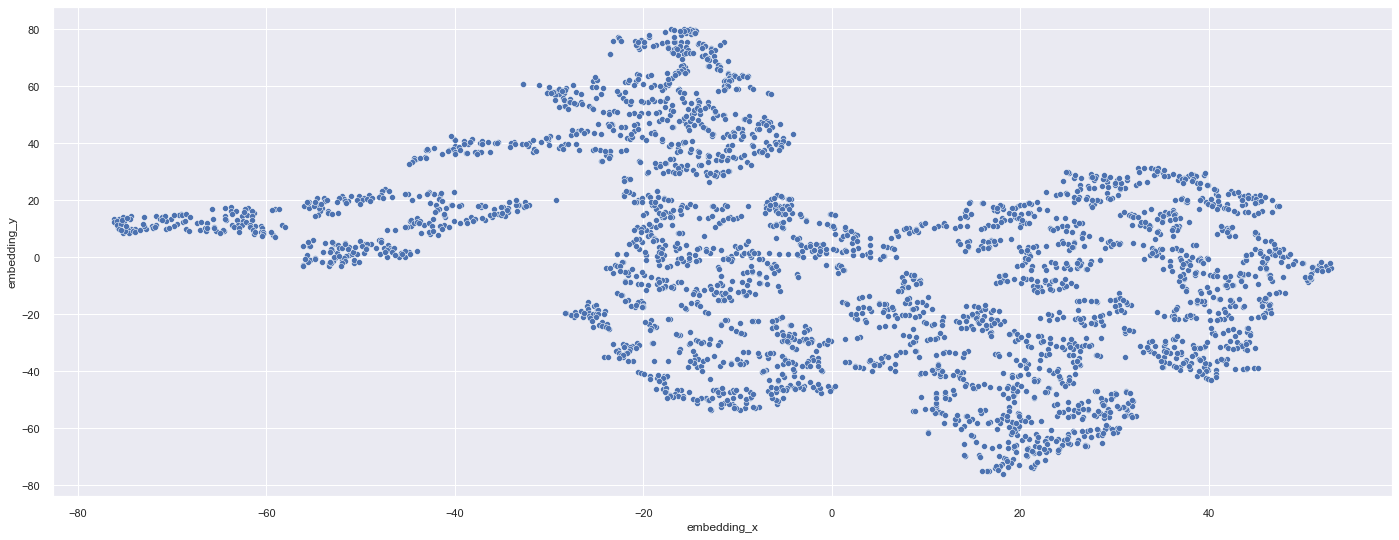

In [84]:
reducer= TSNE(n_components = 2, n_jobs= -1, random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot (x='embedding_x', y='embedding_y', data=df_pca)

### 4.3.3 Tree-Based Embedding

In [85]:
from sklearn import ensemble as en

In [88]:
#training dataset
X = df4.drop (columns=['customer_id', 'gross_revenue'], axis=1)
y = df4['gross_revenue']

#model definition
rf_model = en.RandomForestRegressor(n_estimators = 100, random_state = 42)

#model training
rf_model.fit(X,y)

#leaf


#dataframe leaf


RandomForestRegressor(random_state=42)

In [89]:
df_leaf = pd.DataFrame (rf_model.apply (X))

In [90]:
X.shape

(2969, 10)

In [91]:
df_leaf.shape

(2969, 100)

In [92]:
df_leaf.head()

0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99
0  2982  3092  3277  3324  3034  3025  3050  3335  3378  3149  3164  3303  3141  3282  3115  3241  2838  3164  2890  3247  3209  3125  2885  3281  3414  3395  3124  2986  3102  3319  3063  3387  3365  3350  3333  3301  3350  3127  3017  3000  3128  3178  3396  3151  3166  3080  3142  3361  3413  3098  3196  2350  3172  3316  3325  3232  3128  3263  3092  3132  3418  2918  3175  3250  3160  3108  3240  3003  3131  3326  3279  3265  3062  3261  3167  3355  3389  3102  3210  3178  3075  3329  3268  3109  3307  3145  3296  3201  3132  3294  2968  2461  3231  3106  3152  3330  3016  3341  2973  2873
1  2947  3165  3025  2982  3016  3000  3048  2892  2982  3093  3108  2493  3069  2639  3031  2905  2807  3000  2494  2822  3164  2836  2755  2846  2997  2964  3042  2825  2720  3028  2953  3002  2976  2519  2950  2933  2979  3094  2861  2902  2962  2787  3009  3146  3124  2671  2859  2897  2966  2911  3150  3148  3129  2975  2958  3182  3111  3023  2968  3112  2989  2884  2894  2963  3135  2481  3016  2948  3007  2969  2964  2983  3002  2872  3087  2869  2952  3092  3155  3143  3065  2928  2947  3037  2917  3105  2946  3101  3096  2884  2823  2896  2975  2742  3030  2835  2997  2920  3014  2813
2  3499  3609  3537  3594  3588  3669  3560  3554  3645  3638  3648  3569  3528  3625  3433  3550  3584  3619  3563  3482  3567  3585  3596  3553  3502  3640  3498  3578  3533  3720  3455  3631  3609  3651  3573  3622  3502  3437  3604  3530  3649  3513  3661  3532  3592  3589  3574  3619  3656  3600  3655  3493  3582  3614  3630  3540  3487  3664  3579  3559  3640  3574  3580  3704  3606  3600  3625  3593  3606  3619  3511  3392  3567  3582  3603  3587  3619  3543  3630  3596  3526  3500  3535  3577  3598  3560  3594  3701  3536  3403  3547  3465  3565  3480  3587  3466  3574  3609  3585  3665
3  2136  1973  1566  1816  1838  2217  1805  1840  1574  2008  2186  1303  1251  1342  2032  1821  1939  1578  1972  1422  1831  1523  1578  1419  1597  1874  1603  1900  1967  1522  1475  1420  1359  1558  1698  1554  2084  1563   906  1869  1436  2031  1370  1794  1497  1825  1473  1436  2050  1886  1807  1271  1887  2096  1548  1505  1810  1797  1407  2121  1573  2065  1891  1853  2037  1499  1799  2074  1530  1354  2318  1603  1509  2201  1379  1535  1442  1411  2114  1821  2011  1468  1695  1553  1482  1949  1479  2197  1443  1546  1809  1438  2062  2086  1556  2254  1575  1429  1491  2072
4   253   268   184   603   187   701   702   580   180   163   589   198   692   724   688   601   201   190   591   691   174   232   466   197   731   191   562   214   139   754   602   862   443   333   203   752   342   201   711   588   920   509   447   604   919   540   933   663   699   609   602   971   635   562     8   272   722   616   724   607   229   226   570   608   675   425   564   745   688   905   579   220   526   598   177   278   215   587   602   183   613   332   709   260   526   646   309   863   365   799   420   215   538   590   464   736   569   851   409   207

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

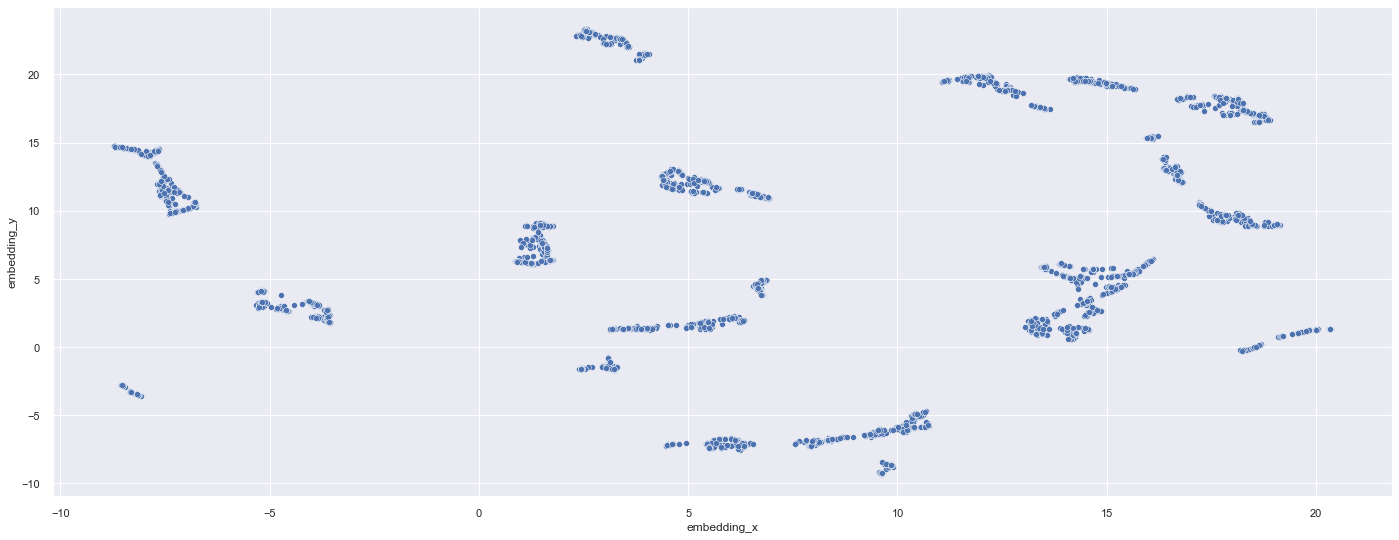

In [93]:
#reduzer dimensionality
reducer= umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leaf)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot (x='embedding_x', y='embedding_y', data=df_pca)

# <font color ='red'> 5.0 Data Preparation </font>

In [42]:
df5=df4.copy()

In [83]:
df5.head(2)

customer_id  gross_revenue  recency_days  invoice_no  avg_ticket  returns
0        17850        5391.21         372.0          35   18.152222      1.0
1        13047        3232.59          56.0          16   18.904035      7.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross_revenue', ylabel='Density'>

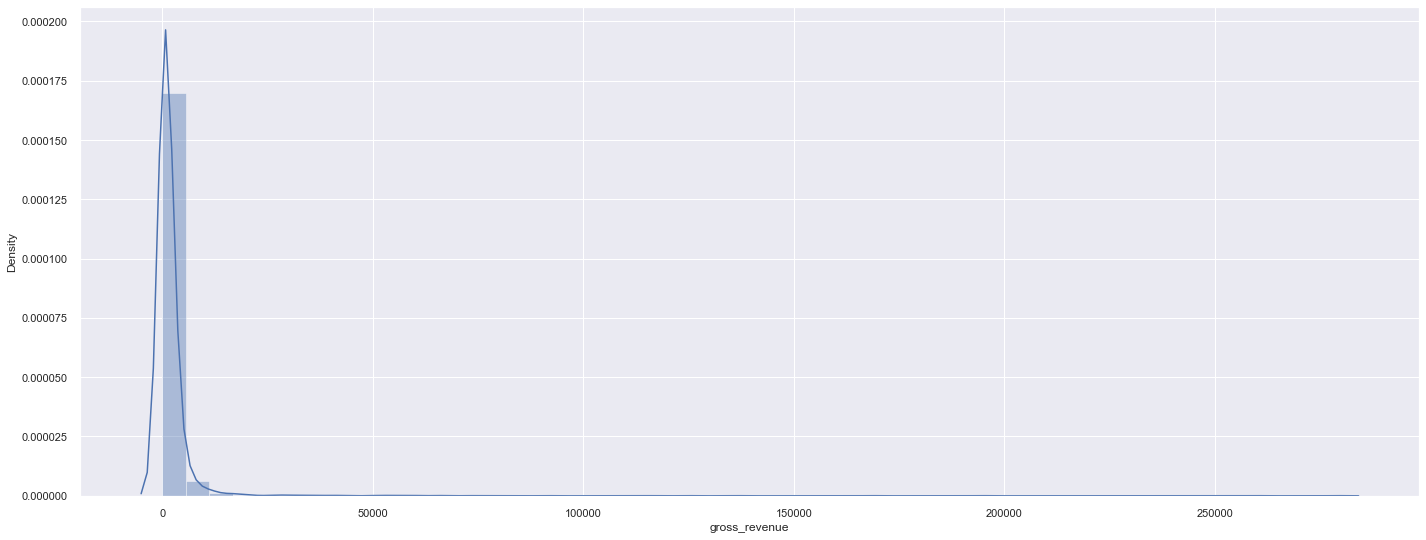

In [63]:
sns.distplot( df5 ['gross_revenue'])

In [64]:
ss = pp.StandardScaler()
df5['gross_revenue']= ss.fit_transform(df5[['gross_revenue']])
df5['recency_days']= ss.fit_transform(df5[['recency_days']])
df5['invoice_no']= ss.fit_transform(df5[['invoice_no']])
df5['avg_ticket']= ss.fit_transform(df5[['avg_ticket']])

# <font color ='red'> 6.0 Feature Selection </font>

In [65]:
df6=df5.copy()

# <font color ='red'> 7.0 Hyperparameter Fine-Tunning </font>

In [54]:
X =df6.drop(columns=['customer_id'])

In [45]:
clusters = [2,3,4,5,6,7]

## 7.1 Within-Cluster Sum of Square (WSS)

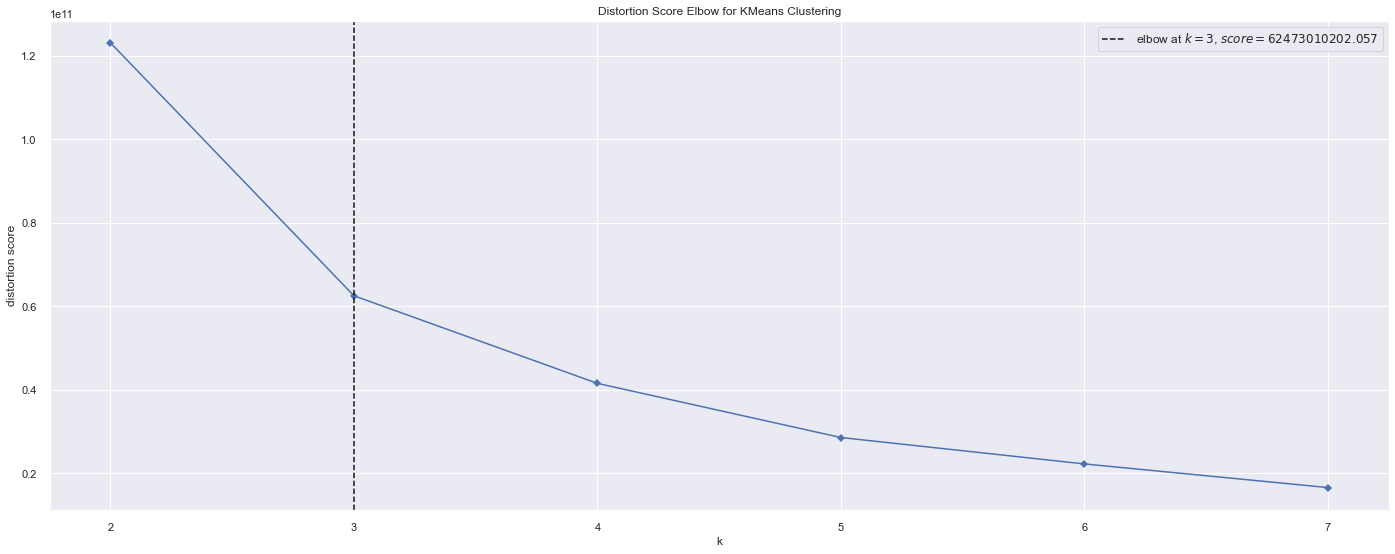

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit( X )
kmeans.show()

## 7.2 Silhouette Score

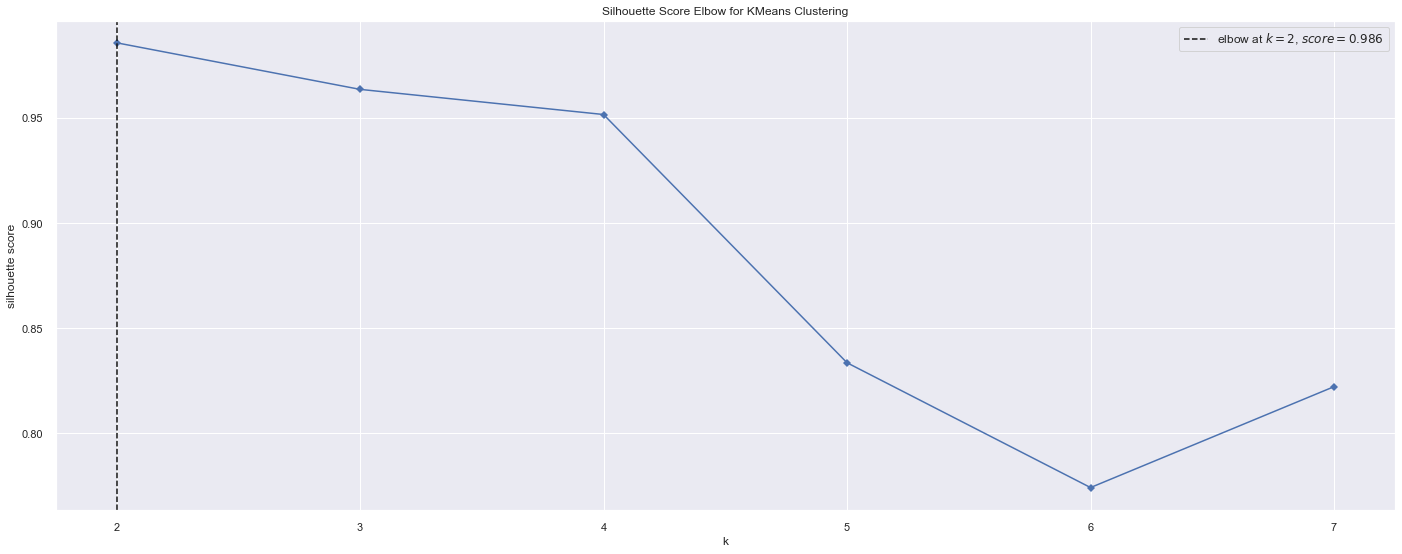

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters,metric = 'silhouette', timings=False)
kmeans.fit( X )
kmeans.show()

## 7.3 Silhouette Analysis

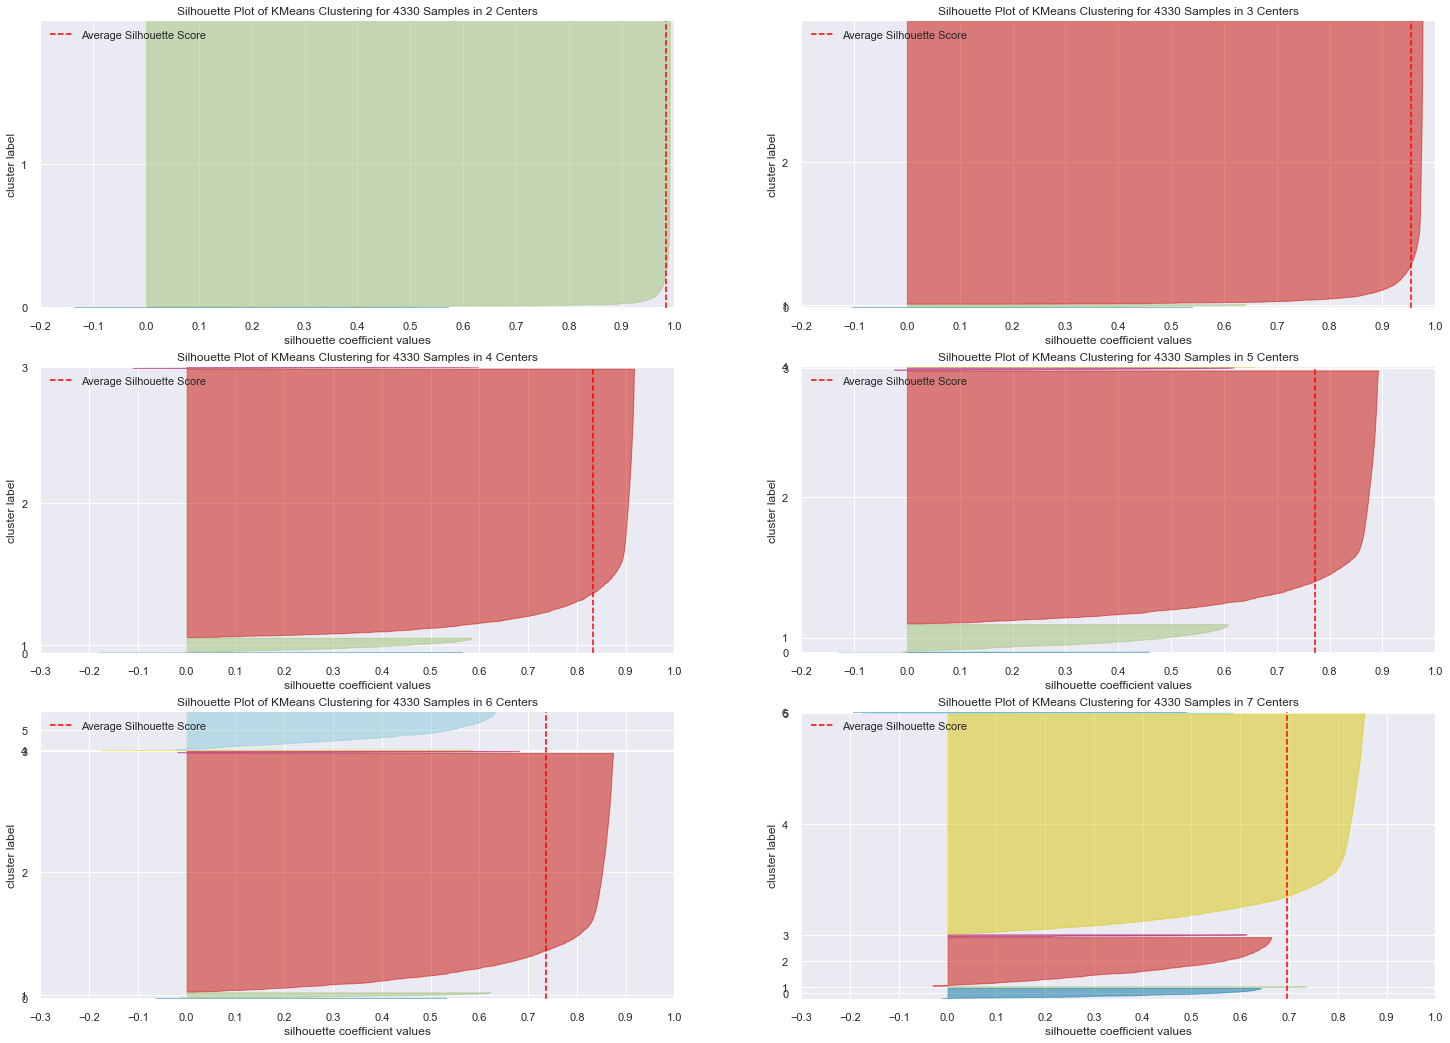

In [48]:
fig, ax = plt.subplots(3,2, figsize =(25,18))

for k in clusters:
    km=c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod (k, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit( X )
    visualizer.finalize()

# <font color ='red'> 8.0 Model Training </font>

## 8.1 K-Means

In [52]:
#Model training
k = 5
kmeans = c.KMeans( init= 'random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

#Model training
kmeans.fit( X )

#clustering
labels = kmeans.labels_

## 8.2 Cluster Validation

In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [57]:
## WSS (within-cluster sum of square)
print ('WSS value: {}'.format(kmeans.inertia_))

## SS (Silhouette Score)
print('WSS value: {}'.format (m.silhouette_score (X, labels, metric='euclidean')))

WSS value: 35879671974.89337


AttributeError: 'DataFrame' object has no attribute 'silhouette_score'

# <font color ='red'> 9.0 Cluster Analysis </font>

## 9.1 Vizualization Inspection

In [58]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head(3)

customer_id  gross_revenue  recency_days  invoice_no  avg_ticket  cluster
0        17850        5391.21         372.0        34.0   18.152222        1
1        13047        3232.59          56.0         9.0   18.904035        2
2        12583        6705.38           2.0        15.0   28.902500        1

## 9.1 Visualization Inspection

In [111]:
#(tenemos mas que 3 features)
#fig = px.scatter_3d( df9, x= 'recency_days', y='invoice_no', z='gross_revenue', color='cluster')
#fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


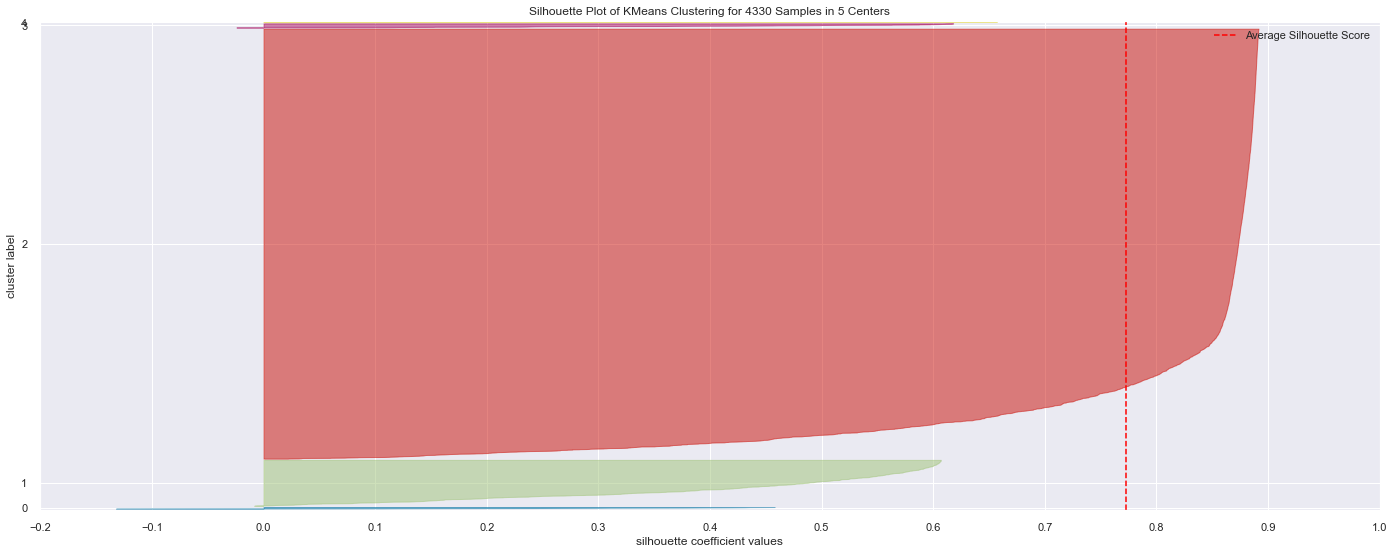

In [59]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit( X )
visualizer.finalize()

## 9.2 2d Plot

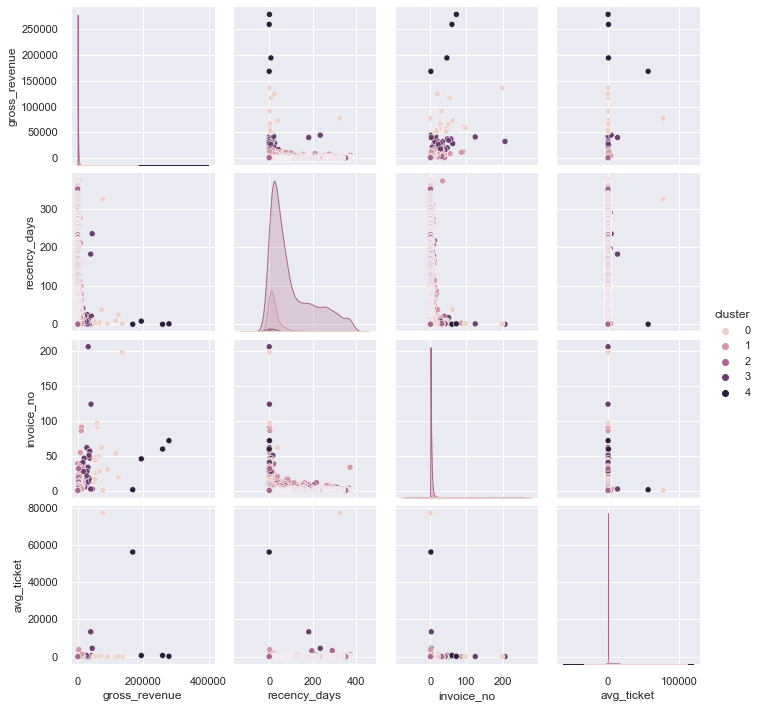

In [60]:
df_viz = df9.drop(columns= 'customer_id', axis=1)
sns.pairplot(df_viz, hue= 'cluster')

## 9.3 UMAP 

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

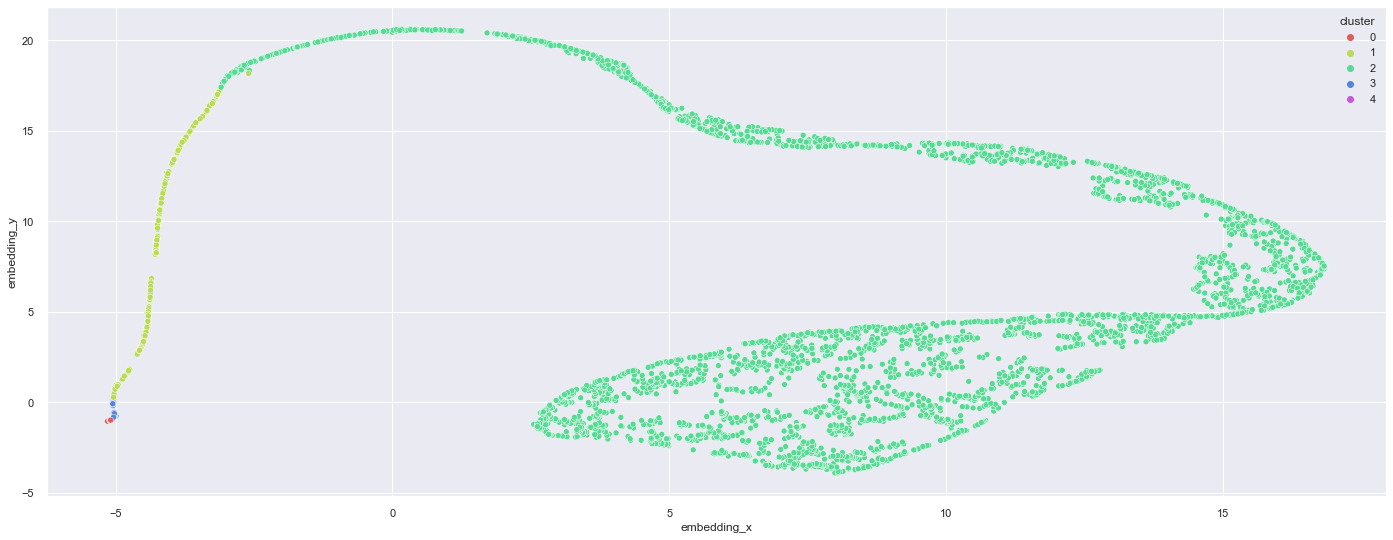

In [61]:
reducer= umap.UMAP(n_neighbors = 30, random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot (x='embedding_x', y='embedding_y', hue= 'cluster', palette = sns.color_palette('hls',n_colors=len(df_viz['cluster'].unique())), data=df_viz)

## 9.4 Cluster Profile

In [62]:
#Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

#Avg gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

#avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on= 'cluster')

#Avg invoice_no
df_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how= 'inner', on= 'cluster')

#Avg ticket
df_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on = 'cluster')

df_cluster

cluster  customer_id  perc_customer  gross_revenue  recency_days  invoice_no    avg_ticket
0        0           16       0.369515   74629.983750     27.562500   51.500000   4988.347953
1        1          413       9.538106    5931.879322     26.193705   12.377724     60.566959
2        2         3859      89.122402     843.498777    100.341798    2.847370     28.482479
3        3           38       0.877598   25173.132632     17.789474   34.157895    585.432464
4        4            4       0.092379  225454.652500      2.250000   45.000000  14368.189768

## Cluster 01: (Candidato a ser Insider)
   - Numero de customers: 6 (0.14% del customers)
   - Recencia en media: 7 días
   - Compras en media: 89 compras
   - Receta en media: $182.182
   
## Cluster 02: 
   - Numero de customers: 31 (0.71 del customers)
   - Recencia en media: 14 días
   - Compras en media: 53 compras
   - Receta en media: $40.543
   
## Cluster 03: 
   - Numero de customers: 4335 (99% del customers)
   - Recencia en media: 92 días
   - Compras en media: 5 compras
   - Receta en media: $1.372.577

# <font color ='red'> 10.0 Deploy to Production </font>